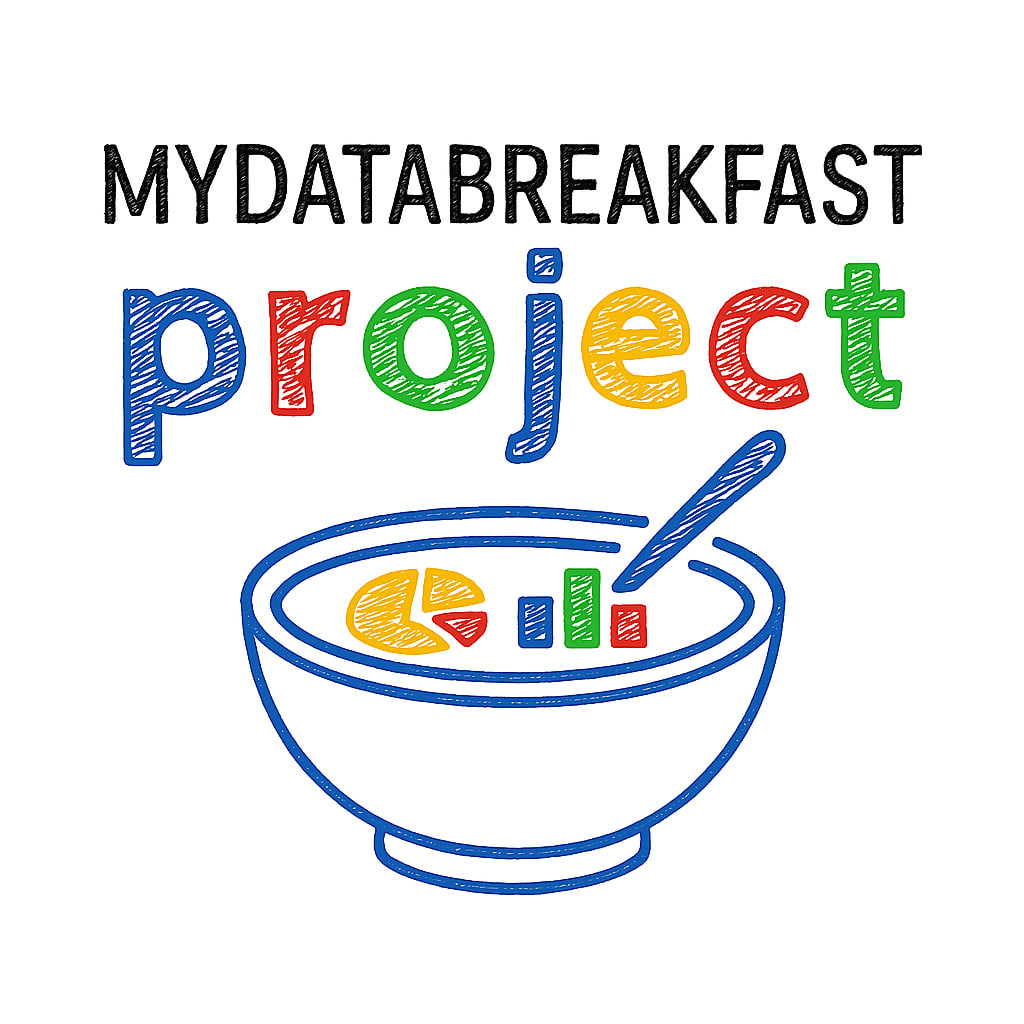

## 🍷 Parte 2 – Vino rosso: Analisi Esplorativa dei Dati (EDA)


### 🥣 Buongiorno a tutti e bentornati su My Data Breakfast!

Dopo aver degustato insieme il vino bianco nella prima parte, oggi passiamo al suo elegante e misterioso fratello: il vino rosso.
Seconda puntata della nostra trilogia gustosa a base di dati, grafici e machine learning!

👉 In questa seconda parte, ci concentreremo sull'analisi esplorativa del dataset sul vino rosso, anch'esso disponibile pubblicamente nel UCI Machine Learning Repository.

👉 Se ti sei perso la prima parte, ti consiglio di recuperarla: abbiamo introdotto tutti i passaggi base dell'EDA sul vino bianco.

👉 E nella terza parte (in arrivo!) metteremo rosso e bianco a confronto: quale sarà il più "correlato" alla qualità? 🍷⚔️🍷

## 🔍 EDA – Step by Step

L’obiettivo di questa seconda tappa è analizzare il dataset del vino rosso con gli stessi strumenti e lo stesso approccio: semplice, accessibile e trasparente.

## 💡 Perché analizzare anche il vino rosso?

Perché lavorare con più dataset simili aiuta ad allenare l’occhio da Data Analyst. Si imparano a riconoscere pattern, anomalie, relazioni tra variabili e a rafforzare l’intuito statistico.

## 📂 Cosa vedremo in questa seconda parte?
    
✅ Importazione e ispezione iniziale dei dati
✅ Pulizia e controllo valori mancanti
✅ Analisi statistica descrittiva
✅ Correlazioni tra variabili e qualità
✅ Grafici mirati (boxplot, scatterplot, istogrammi)
🤖 (Bonus in arrivo): mini modello predittivo
🍷 E un pizzico di storytelling... perché ogni dato ha il suo profumo!

## 🎯 Obiettivo

L’obiettivo non è solo “pulire e analizzare” un file CSV.
È leggere una storia dentro ai dati, imparare a fare domande e costruire risposte usando Python, grafici chiari e intuizioni solide.

In breve:

🎯 Trasformare numeri in intuizioni.
🎯 E intuizioni in decisioni.

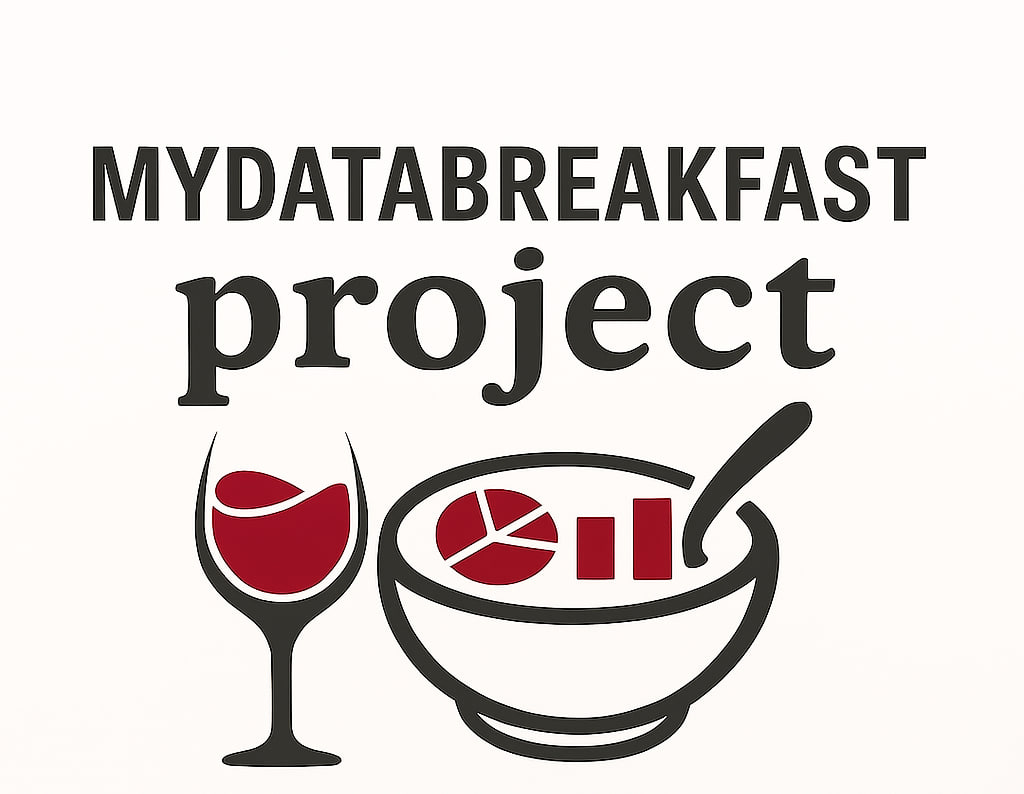


## ✅ Codice completo EDA – Vino bianco

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/patri/Downloads/winequality-red.csv", sep=';') # abbiamo messo sep sepratore 
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

In [8]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [9]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

---------------------------------------------------------------------------------------------------------------------


## 🧼 Controllo valori mancanti

<Axes: >

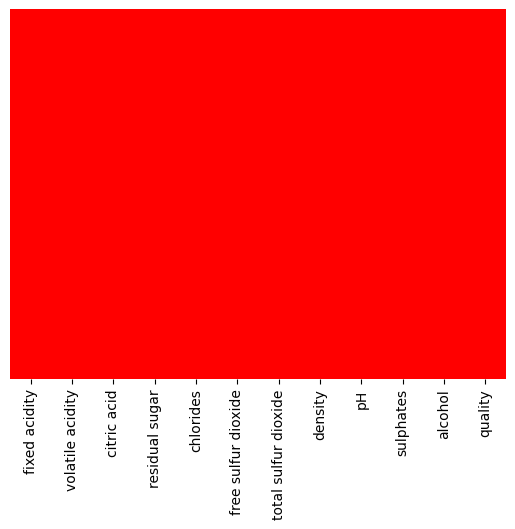

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = (['red', '#8b0000']))


<Axes: >

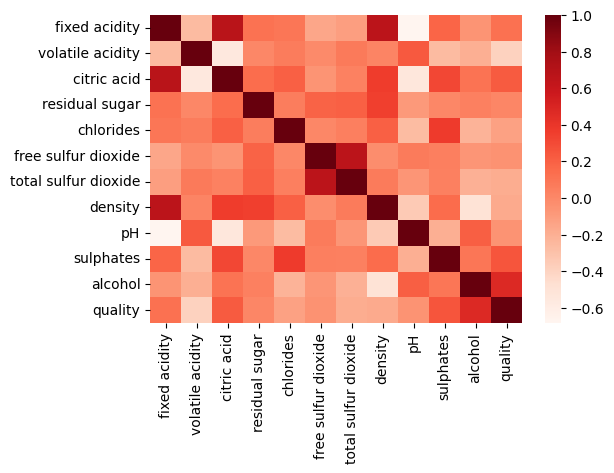

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Reds', annot=False)

--------------------------------------------------

## 🔍 Correlazioni mirate (le 12 variabili più legate alla qualità)

<Axes: >

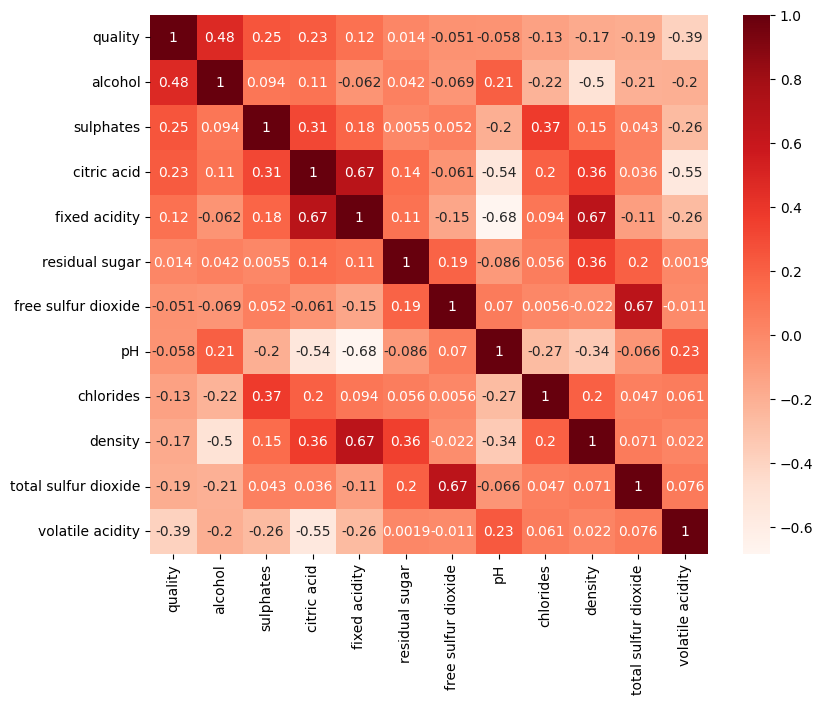

In [32]:
 k = 12 #number of variables for heatmap
 cols = df.corr().nlargest(k, 'quality')['quality'].index
 cm = df[cols].corr()
 plt.figure(figsize=(9,7))
 sns.heatmap(cm, annot=True, cmap = 'Reds')

## 🧮 Distribuzione delle variabili numeriche – Vino Rosso

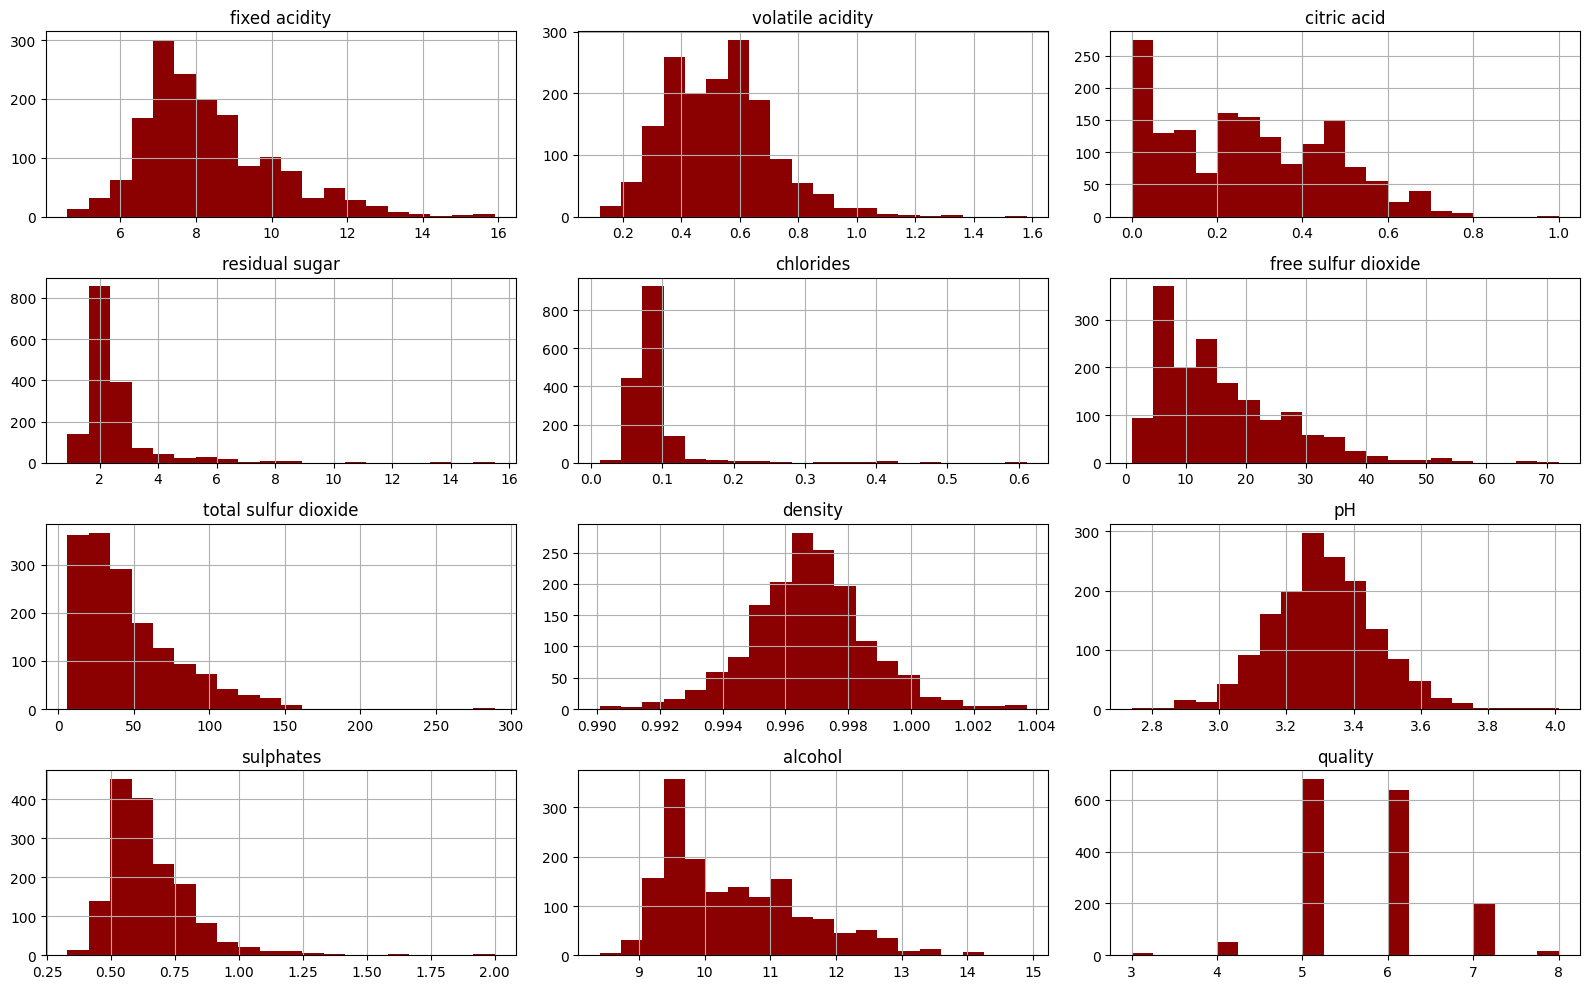

In [30]:
df.select_dtypes(include='number').hist(bins=20, figsize=(16, 10), color='#8b0000') # bins=20: dimensioni (barre dell'istogramma).
plt.tight_layout()
plt.show()

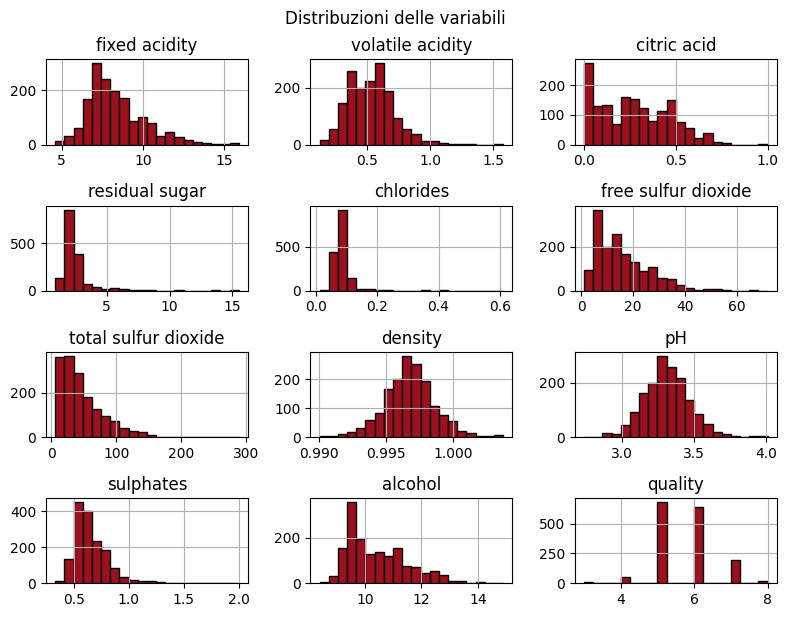

In [42]:
df.select_dtypes(include='number').hist(bins=20, figsize=(8, 6), color='#9b111e', edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribuzioni delle variabili", y=1.02)
plt.show()


## 🧮 ISTOGRAMMA

<Axes: xlabel='quality', ylabel='Count'>

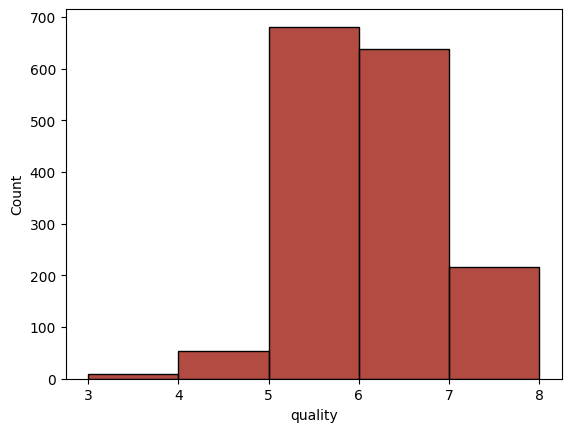

In [61]:
sns.histplot(data=df, x='quality', bins=5, color='#990f02')
sns.boxplot()

Text(0.5, 1.0, 'Boxplot: Alcohol vs Quality')

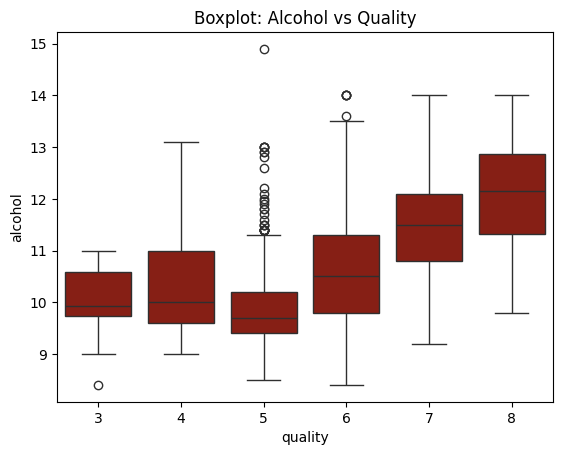

In [54]:
sns.boxplot(data=df, x='quality', y='alcohol', color='#990f02')
plt.title('Boxplot: Alcohol vs Quality')
plt.show()

## 📈 GRAFICO DISPERSIONE

<Axes: xlabel='alcohol', ylabel='density'>

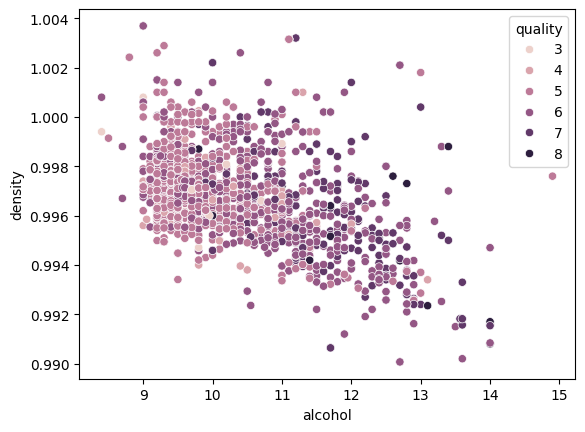

In [58]:
#📈 GRAFICO DISPERSIONE 
sns.scatterplot(data=df, x='alcohol', y='density', hue='quality', color='Reds')
sns.scatterplot() #– Grafico a dispersione


## 🎨 SCATTER GRIGLIA TRA PIU VARIABILI

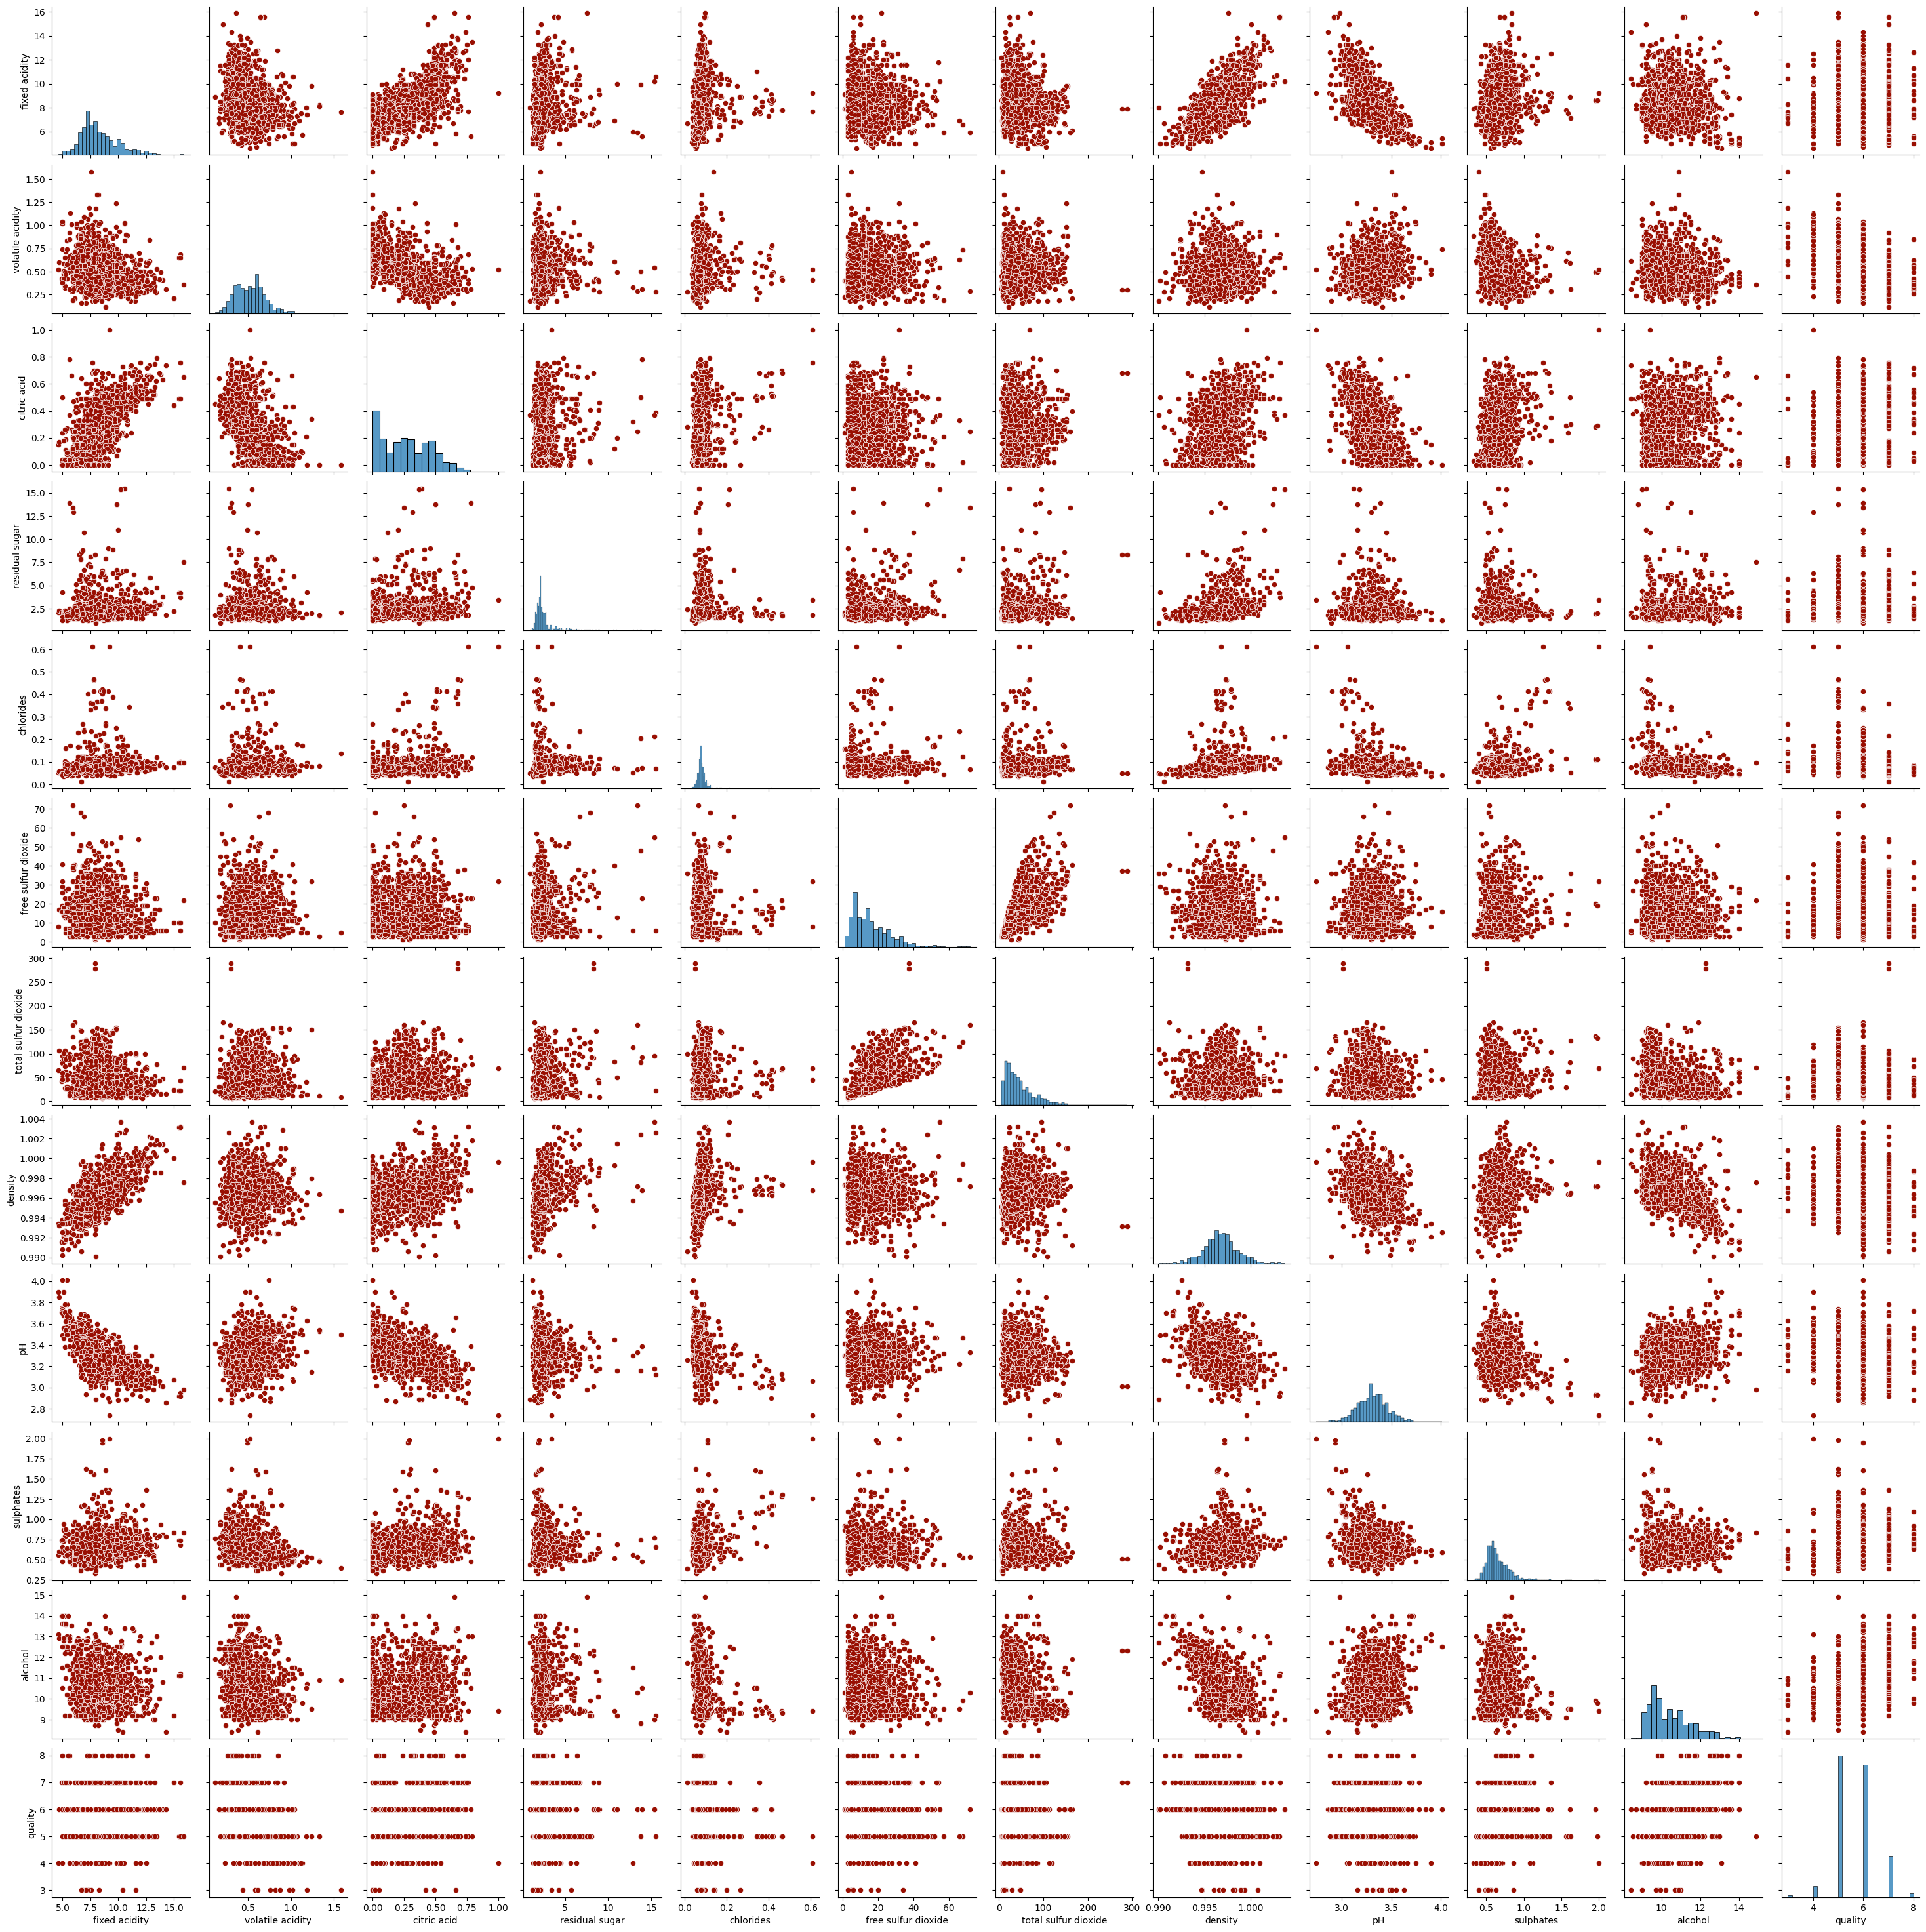

In [59]:
import matplotlib.pyplot as plt

sns.pairplot(df, plot_kws={'color': '#990f02'})
plt.show()

<Axes: xlabel='alcohol', ylabel='quality'>

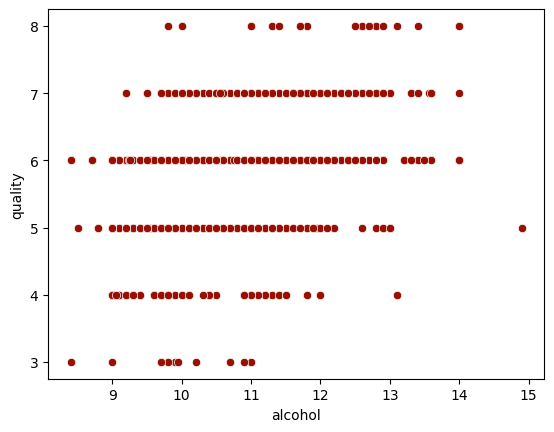

In [60]:
sns.scatterplot(data=df, x='alcohol', y='quality', color='#990f02')